In [136]:
import networkx as nx
import seaborn as sns
import random
import numpy as np
from csv import reader
import pandas as pd
import matplotlib.pyplot as plt
import time

In [137]:
V = pd.read_csv("nodes.csv", sep = ",")
E = pd.read_csv("edges.csv", sep = ",")

In [138]:
V

,Id,Label,timeset,count,views,componentnumber
0,20055789,Ab_Dehkordi,NaN,3,1272,0
1,37946206,DJAVAD_GHODRATI,NaN,1,0,0
2,39421345,Palangsorati,NaN,1,0,0
3,40691394,Omid_babai,NaN,1,0,0
4,44335312,khezli,NaN,1,796,0
...,...,...,...,...,...,...
7609,1595486984,vipmalemir,NaN,10,6137,0
7610,1595968160,tinnnews,NaN,1,0,0
7611,1596929707,rtyuopko,NaN,1,0,0
7612,1597503129,farnoosh_fx,NaN,1,0,0


In [139]:
E

,Source,Target,Type,Id,Label,timeset,Weight
0,20055789,1003010124,Directed,0,NaN,NaN,1
1,37946206,1003363723,Directed,1,NaN,NaN,1
2,40691394,1002992763,Directed,2,NaN,NaN,1
3,44894988,1000335230,Directed,3,NaN,NaN,1
4,44894988,1002655443,Directed,4,NaN,NaN,3
...,...,...,...,...,...,...,...
20531,1595486984,1183711719,Directed,20531,NaN,NaN,3
20532,1595968160,1002739327,Directed,20532,NaN,NaN,1
20533,1596929707,1270308997,Directed,20533,NaN,NaN,1
20534,1597503129,1138510336,Directed,20534,NaN,NaN,1


## Graph

In [140]:
G = nx.from_pandas_edgelist(E, "Source", "Target",create_using=nx.DiGraph)

## IN _DEGREE, OUT_DEGREE FOR EVERY NODE (CHANNAL)

In [141]:
in_degree = pd.DataFrame.from_dict(dict(G.in_degree),orient='index').reset_index()
out_degree = pd.DataFrame.from_dict(dict(G.out_degree),orient='index').reset_index()
in_degree.columns = ['Id','in_degree']
out_degree.columns = ['Id','out_degree']
degree = pd.merge(in_degree, out_degree,on='Id')
degree['degree'] = degree['in_degree']+degree['out_degree']
degree

,Id,in_degree,out_degree,degree
0,20055789,0,1,1
1,1003010124,10,0,10
2,37946206,0,1,1
3,1003363723,5,1,6
4,40691394,0,1,1
...,...,...,...,...
7609,1591552835,0,1,1
7610,1595968160,0,1,1
7611,1596929707,0,1,1
7612,1597503129,0,1,1


In [142]:
V = pd.merge(degree, V,on='Id')
V

,Id,in_degree,out_degree,degree,Label,timeset,count,views,componentnumber
0,20055789,0,1,1,Ab_Dehkordi,NaN,3,1272,0
1,1003010124,10,0,10,edbibroker,NaN,62,4687,0
2,37946206,0,1,1,DJAVAD_GHODRATI,NaN,1,0,0
3,1003363723,5,1,6,VahidOnline,NaN,24,1474441,0
4,40691394,0,1,1,Omid_babai,NaN,1,0,0
...,...,...,...,...,...,...,...,...,...
7609,1591552835,0,1,1,kanaledolar,NaN,163,0,0
7610,1595968160,0,1,1,tinnnews,NaN,1,0,0
7611,1596929707,0,1,1,rtyuopko,NaN,1,0,0
7612,1597503129,0,1,1,farnoosh_fx,NaN,1,0,0


## Number of Weakly Connected Components

In [143]:
components_size = [len(c) for c in sorted(nx.weakly_connected_components(G), key=len, reverse=True)]


In [144]:
print('Number of Weakly Connected Components',len(components_size))

Number of Weakly Connected Components 209


## distribution of weakly_connected_components

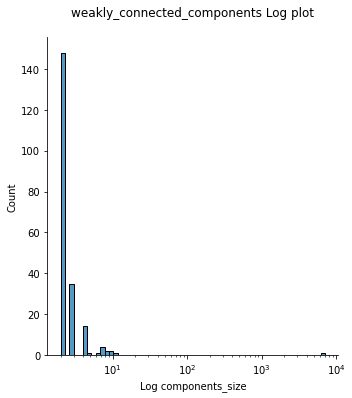

In [145]:
sns.displot(components_size,log_scale=True)
plt.title('weakly_connected_components Log plot\n')
plt.xlabel('Log components_size')
plt.show();

## kmax_in, kmax_out,kmin_in, kmin_out, < k > ,p ,1/N ,Weakly,strongly

In [146]:
Gcc = sorted(nx.strongly_connected_components(G), key=len, reverse=True)
print("Kmax_in =",V['in_degree'].max())
print("Kmax_out =",V['out_degree'].max())
print("Kmin_in =",V['in_degree'].min())
print("Kmin_out =",V['out_degree'].min())
print("<k> =",V['in_degree'].mean())
print("p =",(V['in_degree'].mean()) / 7613 )
print("1/N =",(1 / 7614 ))
print(f'is_weakly_connected   : {nx.is_weakly_connected(G)}')
print(f"is_strongly_connected : {nx.is_strongly_connected(G)}")


Kmax_in = 418
Kmax_out = 65
Kmin_in = 0
Kmin_out = 0
<k> = 2.697136853165222
p = 0.00035428042206294785
1/N = 0.0001313370107696349
is_weakly_connected   : False
is_strongly_connected : False


# < d >

In [147]:
for i in Gcc:
    diameter = nx.diameter(G.subgraph(i))
    if(diameter>1):
        print(diameter)

12
2
2
2


In [148]:
diameter = []
for i in Gcc:
    diameter.append(nx.diameter(G.subgraph(i)))
np.mean(diameter)

0.005370101596516691

## d~lnlnN

In [149]:
γ = 2.48
d_avg=np.log(np.log(7614))
d_avg

2.190283201291571

## CF

In [150]:
clustering_coef = nx.clustering(G)
clustering_df = pd.DataFrame.from_dict(clustering_coef,orient='index').reset_index()
clustering_df.columns = ['Id','clustering_coef']
clustering_df

,Id,clustering_coef
0,20055789,0.000000
1,1003010124,0.044444
2,37946206,0.000000
3,1003363723,0.333333
4,40691394,0.000000
...,...,...
7609,1591552835,0.000000
7610,1595968160,0.000000
7611,1596929707,0.000000
7612,1597503129,0.000000


In [151]:
V = pd.merge(clustering_df, V,on='Id')
V

,Id,clustering_coef,in_degree,out_degree,degree,Label,timeset,count,views,componentnumber
0,20055789,0.000000,0,1,1,Ab_Dehkordi,NaN,3,1272,0
1,1003010124,0.044444,10,0,10,edbibroker,NaN,62,4687,0
2,37946206,0.000000,0,1,1,DJAVAD_GHODRATI,NaN,1,0,0
3,1003363723,0.333333,5,1,6,VahidOnline,NaN,24,1474441,0
4,40691394,0.000000,0,1,1,Omid_babai,NaN,1,0,0
...,...,...,...,...,...,...,...,...,...,...
7609,1591552835,0.000000,0,1,1,kanaledolar,NaN,163,0,0
7610,1595968160,0.000000,0,1,1,tinnnews,NaN,1,0,0
7611,1596929707,0.000000,0,1,1,rtyuopko,NaN,1,0,0
7612,1597503129,0.000000,0,1,1,farnoosh_fx,NaN,1,0,0


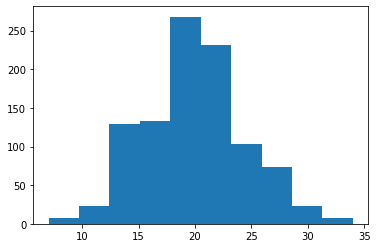

In [152]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.show()

plot_degree_dist(nx.gnp_random_graph(1000, 0.01, directed=True))

## distribution of degree

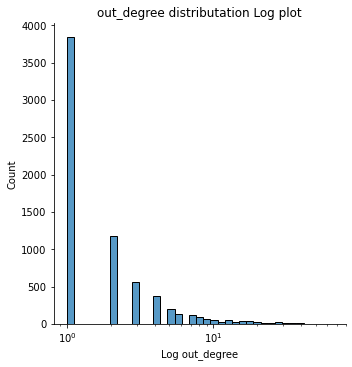

In [153]:
sns.displot(V[V['out_degree']>0], x="out_degree", log_scale=True)
plt.title('out_degree distributation Log plot')
plt.xlabel('Log out_degree')
plt.show();

## distribution of count

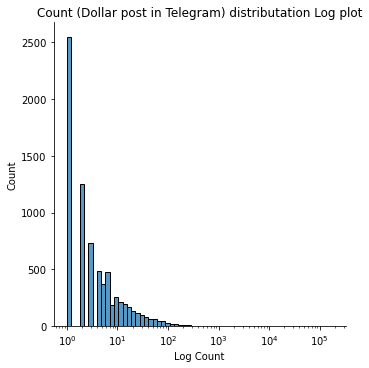

In [154]:
sns.displot(V[V['count']>0], x="count",log_scale=True)
plt.title('Count (Dollar post in Telegram) distributation Log plot')
plt.xlabel('Log Count')
plt.show();

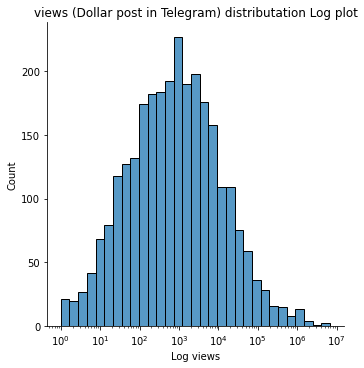

In [155]:
sns.displot(V[V['views']>0], x="views",log_scale=True)
plt.title('views (Dollar post in Telegram) distributation Log plot')
plt.xlabel('Log views')
plt.show();

## distribution of views

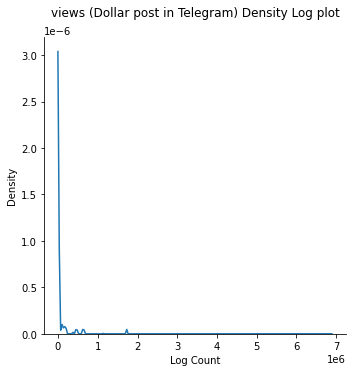

In [156]:
sns.displot(V, x="views",kind="kde",bw_adjust=.05);
plt.title('views (Dollar post in Telegram) Density Log plot\n')
plt.xlabel('Log Count')
plt.show();